In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
"""
import data from NESO (national energy system operator) data downloaded from:
https://www.neso.energy/data-portal/historic-demand-data
year: 2015-2024
"""
NESO = pd.DataFrame()
for year in range(2015,2025):
    NESO = pd.concat([NESO, pd.read_csv(f"data/NG-ESO/demanddata-{year}.csv")])
# get all the settlement dates into the same format
NESO["SETTLEMENT_DATE"] = pd.to_datetime(NESO["SETTLEMENT_DATE"], format="mixed")
# create a datetime column
NESO['datetime'] = pd.to_datetime(NESO["SETTLEMENT_DATE"], format="%Y-%m-%d") + pd.to_timedelta((NESO["SETTLEMENT_PERIOD"]-1)*0.5, unit='h')
# create the demand dataframe
NESO_demand = pd.DataFrame(NESO.set_index("datetime")["ENGLAND_WALES_DEMAND"])

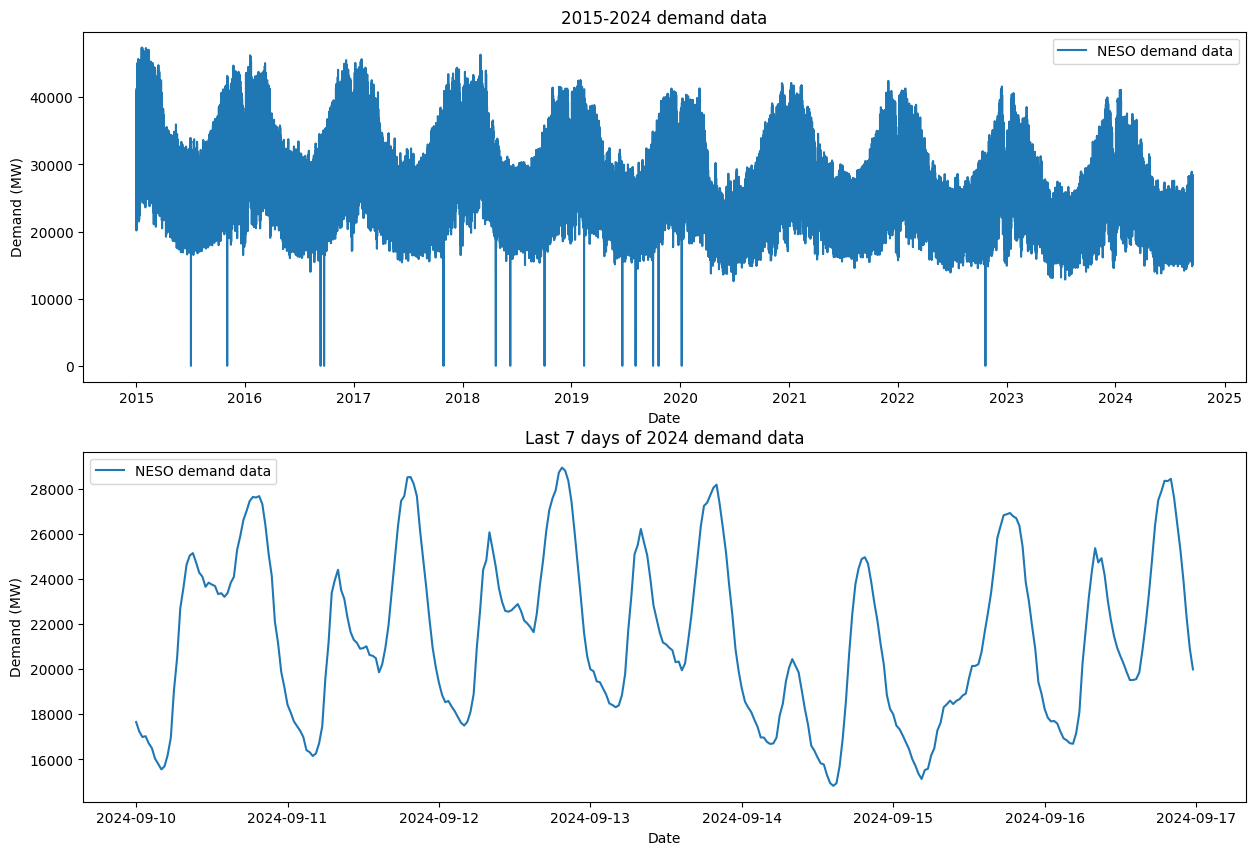

In [27]:
# plot the demand data
fig, ax = plt.subplots(nrows=2, figsize=(15, 10))

# all the data
ax[0].plot(NESO_demand.index, NESO_demand["ENGLAND_WALES_DEMAND"], label="NESO demand data")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Demand (MW)")
ax[0].set_title("2015-2024 demand data")
ax[0].legend()

# last 7 days
ax[1].plot(NESO_demand.index[-7*48:], NESO_demand["ENGLAND_WALES_DEMAND"][-7*48:], label="NESO demand data")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Demand (MW)")
ax[1].set_title("Last 7 days of 2024 demand data")
ax[1].legend()